# 확률

확률은 어떤 사건이 선택될 때 발생하는 불확실 성을 수치적으로 나타낸 것이며 특정 사건 E가 발생활 확률을 P(E)라 한다.

### 1. 종속성과 독립성
사건 E 발생 여부가 사건 F의 발생 여부에 대한 정보를 제공할 경우 E와 F는 종속사건, 아니라면 두 사건은 서로 독립 사건이다.
사건 E,F가 동시에 발생한 확률이 각각 사건이 발생할 확률의 곱과 같다면 두 사건은 독립사건을 의미한다.

***P(E,F) = P(E)P(F)***

### 2. 조건부 확률
두 사건이 반드시 독립 사건이라는 보장이 없고, 사건 F의 확률이 =! 0일 경우, 사건 E가 발생할 확률을 아래와 같이 정의 가능하다.

***P(E|F) = P(E,F) / P(F)***

***P(E,F) = P(E|F) P(F)***

따라서 사건 E,F가 독립사건이라면 아래와 같은 식이 성립된다.

***P(E|F) = P(E)***

아래 코드는 큰 아이가 딸이면서 둘 다 딸일 확률, 둘 중 한 명이 딸이면서 둘 다 딸일 확률을 의미한다.


In [1]:
from collections import Counter
import math, random

In [2]:
def random_kid():
    return random.choice(["boy", "girl"])

In [3]:
kid_test_list = [random_kid() for i in range(10)]
kid_test_list #random_kid 함수는 boy와 girl 두개의 값중에 하는 램덤하게 추출함

['boy', 'girl', 'boy', 'girl', 'boy', 'girl', 'boy', 'boy', 'girl', 'boy']

In [4]:
both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)
for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    if older == "girl": # 큰 아이가 여자일 경우 +1
        older_girl += 1
    if older == "girl" and younger == "girl": #둘다 여자일 경우 +1
        both_girls += 1
    if older == "girl" or younger == "girl": #둘중에 하나라도 여자일경우 +1
        either_girl += 1

print ("P(both | older):", both_girls / older_girl)      # 0.514 ~ 1/2 #큰 아이가 딸이고 둘다 딸일 확률
print ("P(both | either): ", both_girls / either_girl)   # 0.342 ~ 1/3 # 둘중에 한명이 딸이면서 둘 따 딸일 확률

P(both | older): 0.5007089325501317
P(both | either):  0.3311897106109325


### 3. 베이즈 정리
베이즈 정리는 조건부 확률을 반대로 뒤집는 정리이다. 사건 F가 발생하고 P(E)가 필요한 경우, 사건 E가 발생했다는 가정하에 P(F)만 주어졌다면 조건부 확률의 정의를 두 번 사용하여 아래와 같은 식을 유도할 수 있다.

***P(E|F) = P(E,F)|P(F) = P(F|E)P(E)|P(F)***

P(F)는 'F, E모두 발생하는 경우'와 'F는 발생하지만 E는 발생하지 않은 상호 배타적인 두 사건이다.

***P(F) = P(F,E) + P(F,!E)***

따라서 다음과 같이 베이즈 정리를 유도할 수 있다.

***P(E|F) = P(F|E)P(E) / [P(F|E)P(E) + P(F|!E)P(!E)]***

### 4. 확률변수
확률변수는 특정 확률분포와 연관되어 있는 변수를 의미한다. 예로, 동전 던지기에서 앞뒷면이 나올 확률은 각각 0.5이다. 모든 확률변수의 확률을 해당 확률변수의 값으로 가중편균한 값인 확률변수의 기댓값으로 도출할 수 있다. 예로 동전던지기의 기댓값은 ***0(뒷면) * 1/2 + 1(앞면)* 1/2 = 1/2*** 이다.

### 5. 연속분포
동전던지기는 이산형 분포를 따르지만 대부분 경우 연속적인 결과에 대한 분포를 사용해서 모델을 만든다. 균등분포는 0~1의 모든 값에 동등한 비중을 준 분포이다. 0~1 사이에 무한히 많은 수가 존재하기에, 숫자 하나의 비중은 0일 것이다. 이러한 이유로 밀도함수를 특정 구간에서 적분한 값으로 확률을 나타내는 확률밀도함수로 연속분포를 표현한다.

아래는 균등 분포의 확률 밀도함수를 코드로 작성한 것이다.

In [2]:
def uniform_pdf(x):
    return 1 if x >= 0 and x < 1 else 0

In [3]:
def uniform_cdf(x):
    "균등분포를 따르는확률변수의 값이 x보다 작거나 같을 확률을 반환"
    if x < 0:   
        return 0    # 균등분포의 확률은 절대로 0보다 작을 수 없음
    elif x < 1: 
        return x    # e.g. P(X < 0.4) = 0.4
    else:       
        return 1    # 균등분포의 확률은 항상 1보다 작음

In [14]:
import numpy as np
x = np.arange(-1.0, 2.0, 0.1)

result_array = np.vectorize(uniform_cdf, otypes=[np.float])(x)
result_array

array([ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1. ,
        1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ])

Populating the interactive namespace from numpy and matplotlib


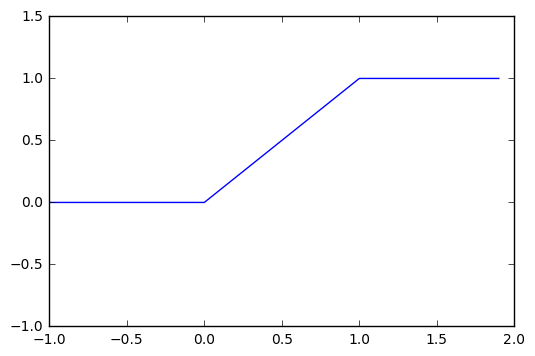

In [5]:
import matplotlib.pyplot as plt
%pylab inline

plt.plot(x, result_array)
plt.axis([-1, 2, -1, 1.5])
plt.show()

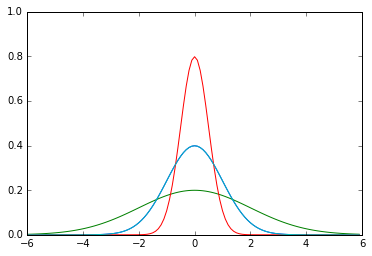

In [9]:
def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (sqrt_two_pi * sigma))

for sigma_value in [1,2,0.5,1]:
    x = np.arange(-6.0, 6.0, 0.1)
    result_array = np.vectorize(normal_pdf, otypes=[np.float])(x, sigma=sigma_value)
#     plt.plot(x, result_array, "ro")
    plt.plot(x, result_array)
    
plt.axis([-6, 6, 0, 1])
plt.show()

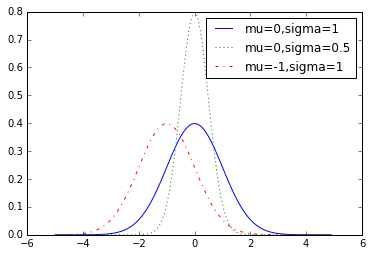

In [10]:
def plot_normal_pdfs(plt):
    xs = [x / 10.0 for x in range(-50, 50)]
    plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
    plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
    plt.plot(xs,[normal_pdf(x,mu=-1)   for x in xs],'-.',label='mu=-1,sigma=1')
    plt.legend()
    plt.show()   

import matplotlib.pyplot as plt
plot_normal_pdfs(plt)

In [11]:
def normal_cdf(x, mu=0,sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

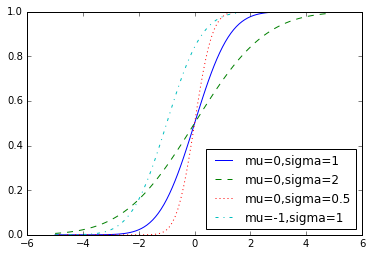

In [12]:
def plot_normal_cdfs(plt):
    xs = [x / 10.0 for x in range(-50, 50)]
    plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
    plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
    plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
    plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
    plt.legend(loc=4) # bottom right
    plt.show()

import matplotlib.pyplot as plt
plot_normal_cdfs(plt)

In [13]:
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    """find approximate inverse using binary search"""

    # if not standard, compute standard and rescale
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    
    low_z, low_p = -10.0, 0            # normal_cdf(-10) is (very close to) 0
    hi_z,  hi_p  =  10.0, 1            # normal_cdf(10)  is (very close to) 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2     # consider the midpoint
        mid_p = normal_cdf(mid_z)      # and the cdf's value there
        if mid_p < p:
            # midpoint is still too low, search above it
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            # midpoint is still too high, search below it
            hi_z, hi_p = mid_z, mid_p
        else:
            break

    return mid_z

In [14]:
np.vectorize(inverse_normal_cdf, otypes=[np.float])([0, 0.5, 0.90, 0.95, 0.975, 1])

# 0%, 50%, 90%, 95%, 97.5%, 100%의 확률일경우 누적분포의 확률변수값

array([-8.75      ,  0.        ,  1.28155708,  1.64484978,  1.95996284,
        8.75      ])

In [15]:
def bernoulli_trial(p):
    return 1 if random.random() < p else 0

In [16]:
def binomial(p, n):
    return sum(bernoulli_trial(p) for _ in range(n))

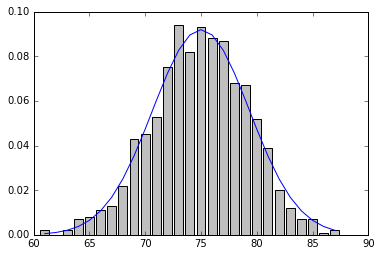

In [17]:
def make_hist(p, n, num_points):
    
    data = [binomial(p, n) for _ in range(num_points)]
    
    # use a bar chart to show the actual binomial samples
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
            [v / num_points for v in histogram.values()],
            0.8,
            color='0.75')
    
    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))

    # use a line chart to show the normal approximation
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma) 
          for i in xs]
    plt.plot(xs,ys)
    plt.show()

make_hist(0.75,100,1000)

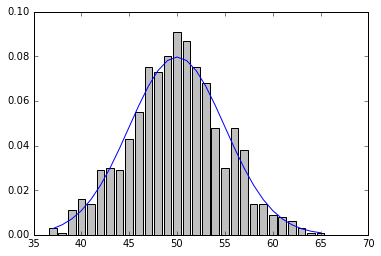

In [18]:
make_hist(0.50,100,1000)